# [CSCI 3399] Lab 1b: Linear Regression

**Posted:** Tuesday, Jan 23, 2024

**Due:** Tuesday, Jan 30, 2024

__Total Points__: 11 pts

__Submission__: please rename the .ipynb file as __\<your_username\>_lab1b.ipynb__ before you submit it to canvas. Example: yuanyua_lab1b.ipynb.

In [75]:
## utility functions

# dataset split
def data_split(N, ratio=[6,2,2]):
    # generate a shuffle array
    shuffle_idx = np.arange(N)
    np.random.shuffle(shuffle_idx)
    # divide into train-val-test by the ratio
    data_split = (np.cumsum(ratio)/float(sum(ratio))*N).astype(int)
    out_idx = [None] * len(ratio)
    out_idx[0] = shuffle_idx[:data_split[0]]
    for i in range(1,len(ratio)):
        out_idx[i] = shuffle_idx[data_split[i-1] : data_split[i]]
    return out_idx

def MSE(y,y_hat):
    # Lec. 3, page 8
    return ((y-y_hat)**2).mean()

# <b>1. Linear regression</b>

## 1.1 Dataset Generation

Text(0.5, 1.0, '1D Training data')

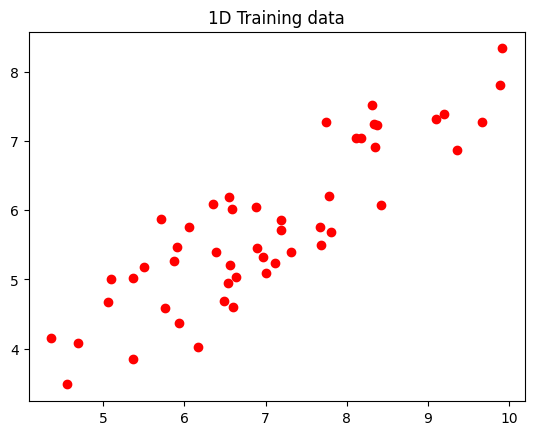

In [76]:
# data generation
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

# gt function y = 0.73x + 0.58
theta_gt = [0.58, 0.73]  # theta_0,theta_1
num_pt = 50

X_train = np.random.uniform(4, 10, num_pt).reshape(-1,1)
Y_train = theta_gt[0] + theta_gt[1] * X_train+ 0.5 *np.random.normal(0, 1, num_pt).reshape(-1,1)

plt.plot(X_train,Y_train,'ro')
plt.title('1D Training data')

## 1.2 Use 1-dim linear regression formula (Closed-Form Solution)

Lec. 3, page 21

gt theta [0.58, 0.73]
estimated theta (1-dim formula) [0.8263436675747275, 0.702372030231059]
---------
MSE error 0.3071274913011362


Text(0.5, 1.0, '1D Training data')

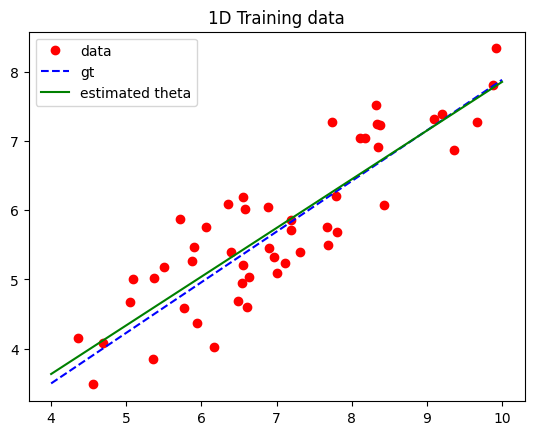

In [77]:
theta_1 = (X_train*Y_train).mean()-X_train.mean()*Y_train.mean()
theta_1 = theta_1/ ((X_train**2).mean()-X_train.mean()**2)
theta_0 = Y_train.mean()-theta_1*X_train.mean()

print('gt theta', theta_gt)
print('estimated theta (1-dim formula)', [theta_0,theta_1])
print('---------')

# evaluation on the training data
Y_train_hat = X_train*theta_1+theta_0
print('MSE error', MSE(Y_train, Y_train_hat))

# for visualization
XX = np.linspace(4,10,100).reshape(-1,1)

plt.plot(X_train,Y_train,'ro')
plt.plot(XX, XX*theta_gt[1]+theta_gt[0],'b--')
plt.plot(XX, XX*theta_1+theta_0,'g-')
plt.legend(['data', 'gt','estimated theta'])


plt.title('1D Training data')

## 1.3 Use N-dim linear regression formula (Closed-Form Solution)

The formula gives the same result as above.
lec. 3, page 23

gt theta [0.58, 0.73]
estimated theta (N-dim formula) [[0.82634367]
 [0.70237203]]
---------
MSE error 0.30712749130113615


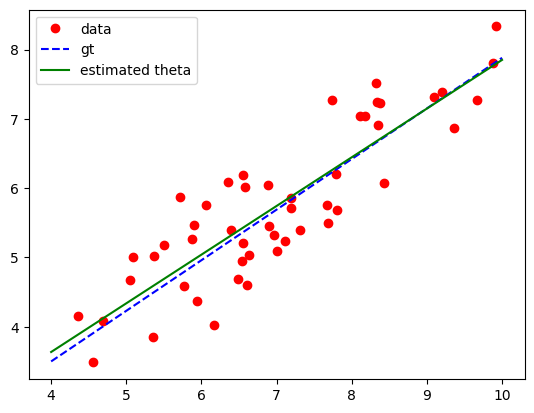

In [78]:
X_train_aug = np.hstack([np.ones([len(X_train),1]),X_train])

theta_nd = np.linalg.solve(np.matmul(X_train_aug.T, X_train_aug), np.matmul(X_train_aug.T, Y_train))

print('gt theta', theta_gt)
print('estimated theta (N-dim formula)', theta_nd)
print('---------')

# evaluation on the training data
Y_train_hat = X_train*theta_nd[1]+theta_nd[0]
print('MSE error', MSE(Y_train, Y_train_hat))

# for visualization
XX = np.linspace(4,10,100).reshape(-1,1)

plt.plot(X_train,Y_train,'ro')
plt.plot(XX, XX*theta_gt[1]+theta_gt[0],'b--')
plt.plot(XX, XX*theta_nd[1]+theta_nd[0],'g-')
plt.legend(['data', 'gt','estimated theta'])


# <b>2. Polynomial regression</b>
Linear regression + polynomial feature

## 2.1 Data generation

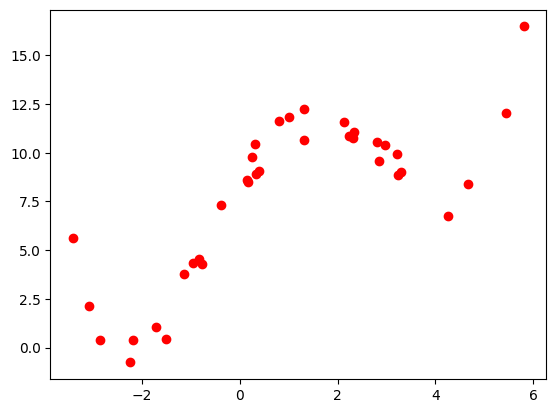

In [79]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

# gt polynomial: y = 0.066x^4 -0.32x^3 -0.85x^2 +4.2x + 8.2
def g(x):
  # return the value of the defined g(x) at value x
  return 8.2 + 4.2*x**1 -0.85*x**2 -0.32*x**3+ 0.066*x**4

num_pt = 60

X2 = np.random.uniform(-4, 6, num_pt).reshape(-1,1)
theta_gt2 = [8.2, 4.2, -0.85, -0.32, 0.066]
Y2 = g(X2) + 0.5 *np.random.normal(0, 1, num_pt).reshape(-1,1)

train_idx2, val_idx2, test_idx2 = data_split(len(Y2))
X_train2, Y_train2 = X2[train_idx2], Y2[train_idx2]
X_val2, Y_val2 = X2[val_idx2], Y2[val_idx2]
X_test2, Y_test2 = X2[test_idx2], Y2[test_idx2]

plt.plot(X_train2,Y_train2,'ro')

## 2.1 Use N-dim linear regression formula

Lec.3, page 23,27

gt theta [8.2, 4.2, -0.85, -0.32, 0.066]
estimated theta (N-dim formula) [[ 7.37376376]
 [ 1.67862114]
 [-0.16598618]]
---------
MSE error 5.723892779601521


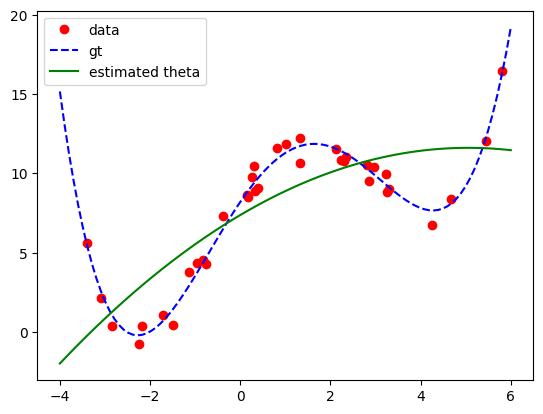

In [80]:
def polyRegression2(x, y=None, theta=None):
  x_feat = np.hstack([np.ones([len(x),1]), x, x**2])
  if theta is None: # training
    return np.linalg.solve(np.matmul(x_feat.T, x_feat), np.matmul(x_feat.T, y))
  else: # prediction
    return np.matmul(x_feat, theta)


theta_nd2 = polyRegression2(X_train2, Y_train2)


print('gt theta', theta_gt2)
print('estimated theta (N-dim formula)',theta_nd2)
print('---------')

# evaluation on the training data
Y_train2_hat = polyRegression2(X_train2, None, theta_nd2)
print('MSE error', MSE(Y_train2, Y_train2_hat))


# for visualization
XX2 = np.linspace(-4,6,100).reshape(-1,1)

plt.plot(X_train2,Y_train2,'ro')
plt.plot(XX2, g(XX2), 'b--')
plt.plot(XX2, polyRegression2(XX2, None, theta_nd2), 'g-')
plt.legend(['data', 'gt','estimated theta'])


## 2.2 Use N-dim linear regression formula with L2 regression

Lec.3, page 22, 23, 33




Regularized linear regression
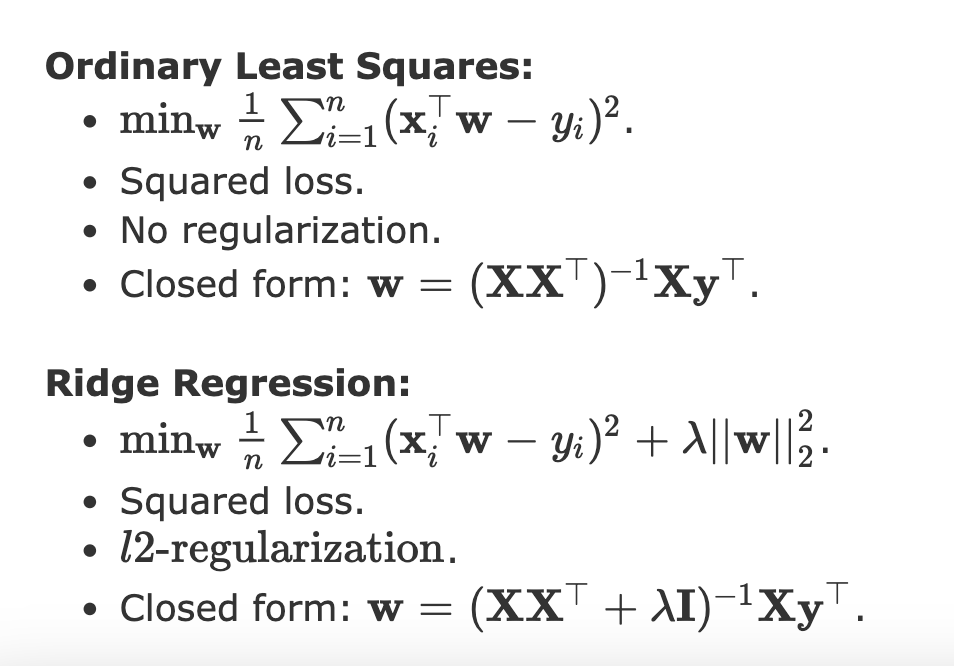


https://aunnnn.github.io/ml-tutorial/html/blog_content/linear_regression/linear_regression_regularized.html

gt theta [8.2, 4.2, -0.85, -0.32, 0.066]
estimated theta (N-dim formula) [[ 7.37027886]
 [ 1.67831344]
 [-0.16572165]]
---------
MSE error 5.723900069866196


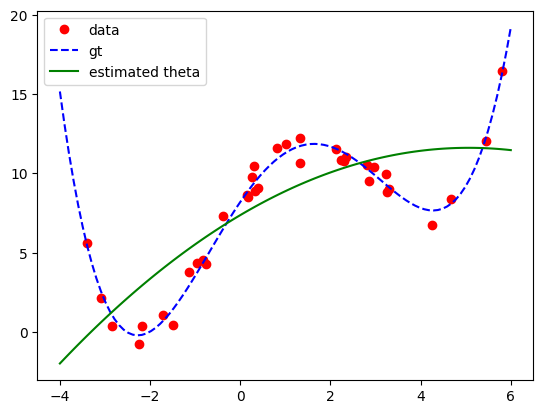

In [81]:
def ridgeRegression2(x, y=None, lamda=0.0001, theta=None):
  x_feat = np.hstack([np.ones([len(x),1]), x, x**2])
  if theta is None: # training
    return np.linalg.solve(np.matmul(x_feat.T, x_feat) + lamda*np.eye(x_feat.shape[1]), np.matmul(x_feat.T, y))
  else: # prediction
    return np.matmul(x_feat, theta)


lamda = 0.01  # Try different lamda, such as 0.0001, 0.001, 1, 10, and observe the value of theta_nd2
theta_nd2 = ridgeRegression2(X_train2, Y_train2, lamda)


print('gt theta', theta_gt2)
print('estimated theta (N-dim formula)',theta_nd2)
print('---------')

# evaluation on the training data
Y_train2_hat = ridgeRegression2(X_train2, None, lamda, theta_nd2)
print('MSE error', MSE(Y_train2, Y_train2_hat))


# for visualization
XX2 = np.linspace(-4,6,100).reshape(-1,1)

plt.plot(X_train2,Y_train2,'ro')
plt.plot(XX2, g(XX2), 'b--')
plt.plot(XX2, polyRegression2(XX2, None, theta_nd2), 'g-')
plt.legend(['data', 'gt','estimated theta'])


# Exercise (11 pts)

## (1) [3 pts] Polynomial regressor for any order of K


### (a) [2 pt] Build the regressor
Build a function to do polynomial regression with the input order K (e.g., $\sum_{i=0}^{k}\theta_ix^i$). Like `polyRegression2`, return the estimated theta if `theta is None`, o/w return the prediction result.

Hints: there are two possible ways to do this:
- create the feature in the beginning and use for-loop to fill in each feature dimension
- create a list `l` where each element is a column vector. then `np.hstack(l)` can combine them into a matrix

In [82]:
def polyRegressionK(x, K, y=None, theta=None):
  ### Your code starts here
  #compute x_feat
  x_feat = np.hstack([x**i for i in range(K + 1)])

  if theta is None: # training
    return np.linalg.solve(np.matmul(x_feat.T,x_feat), np.matmul(x_feat.T,y))
  else: # prediction
    return np.matmul(x_feat, theta)
  ### Your code ends here 

### (b) [1 pt] Sanity check
For K=2, print the MSE error for the train data (X_train2, Y_train2) in section 2 and check if the MSE values agree.


In [83]:
### Your code starts here
k = 2
theta_k2 = polyRegressionK(X_train2, k, Y_train2)
y_traink2_hat = polyRegressionK(X_train2, k, None, theta_k2)

print('MSE error', MSE(Y_train2, y_traink2_hat))
### Your code ends here

MSE error 5.723892779601521


## (2) [8 pts] Model selection
Given the data (X_train2, Y_train2), we want to train polynomial regression models with degree between 1 and 10 (`Ks=np.arange(1,11)`).

Lec. 3, slide 22

### (a) [3 pts] Compute the training loss
- For each K value, train a polynomial regression model with order=K on (X_train2, Y_train2), save its MSE in an array `loss_train`.
- Which K shall we choose if the goal is to minimize the training error
- Visualize the best model selected on the training data


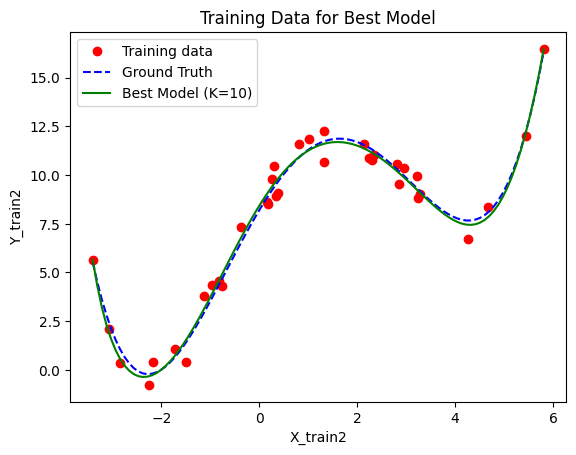

In [93]:
loss_train = np.zeros(11)

### Your code starts here
for k in range(1,11):
    theta_current = polyRegressionK(X_train2, k, Y_train2)
    y_train_current = polyRegressionK(X_train2, k, None, theta_current)
    mse_current = MSE(Y_train2, y_train_current)

    loss_train[k] = mse_current

min_K = np.argmin(loss_train[1:]) + 1

## Visualization
K_range = np.linspace(X_train2.min(), X_train2.max(), 100).reshape(-1, 1)

# plot train data
plt.plot(X_train2, Y_train2, 'ro',label='Training data')
plt.title('Training Data for Best Model')
# plot gt function
plt.plot(K_range, g(K_range), 'b--', label='Ground Truth')
# plot estimated function
theta_best_model = polyRegressionK(X_train2, min_K, Y_train2)
Y_train_best_model = polyRegressionK(K_range, min_K, None, theta_best_model)
plt.plot(K_range, Y_train_best_model, 'g-', label=f'Best Model (K={min_K})')

plt.xlabel('X_train2')
plt.ylabel('Y_train2')
plt.legend()
plt.show()

### Your code ends here

### (b) [3 pts] Compute the validation loss
- For each K value, evaluate the trained model on (X_val2, Y_val2), save its MSE in an array `loss_val`. (okay to re-train the model)
- Which K shall we choose if the goal is to minimize the validation error
- Visualize the best model selected on the validation data

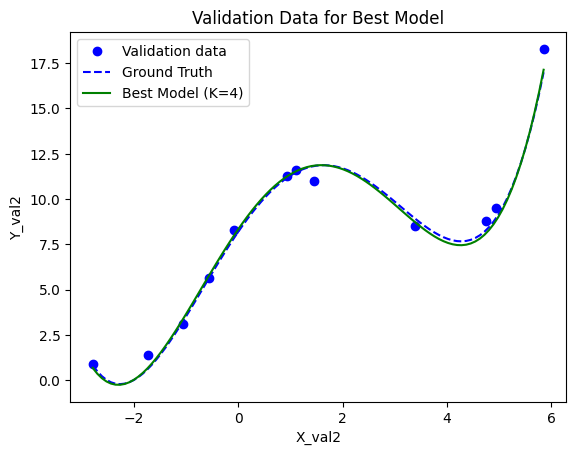

In [95]:
loss_val = np.zeros(11)

### Your code starts here
for k in range(1, 11):
    theta_current = polyRegressionK(X_train2, k, Y_train2)
    y_val_current = polyRegressionK(X_val2, k, None, theta_current)
    mse_val_current = MSE(Y_val2, y_val_current)

    loss_val[k] = mse_val_current

min_K_val = np.argmin(loss_val[1:]) + 1

## Visualization on Validation Data
K_range = np.linspace(X_val2.min(), X_val2.max(), 100).reshape(-1, 1)

# plot validation data
plt.plot(X_val2, Y_val2, 'bo', label='Validation data')
plt.title('Validation Data for Best Model')
# plot gt function
plt.plot(K_range, g(K_range), 'b--', label='Ground Truth')
# plot estimated function for the best model
theta_best_model_val = polyRegressionK(X_train2, min_K_val, Y_train2)
Y_val_best_model = polyRegressionK(K_range, min_K_val, None, theta_best_model_val)
plt.plot(K_range, Y_val_best_model, 'g-', label=f'Best Model (K={min_K_val})')

plt.xlabel('X_val2')
plt.ylabel('Y_val2')
plt.legend()
plt.show()

### Your code ends here


### (c) [2 pts] "Final/real-world" evaluation
- Compute the loss of the two selected models above on the test data (X_test2, Y_test2). Which is better?
- Briefly explain why.


In [96]:
### Your code starts here
theta_best_train = polyRegressionK(X_train2, min_K, Y_train2)
Y_test_best_train = polyRegressionK(X_test2, min_K, None, theta_best_train)
mse_test_best_train = MSE(Y_test2, Y_test_best_train)

# Evaluate the best model based on validation error on the test data
theta_best_val = polyRegressionK(X_train2, min_K_val, Y_train2)
Y_test_best_val = polyRegressionK(X_test2, min_K_val, None, theta_best_val)
mse_test_best_val = MSE(Y_test2, Y_test_best_val)

# Print MSE for both models on the test data
print(f'MSE for best model based on training error (K={min_K}): {mse_test_best_train}')
print(f'MSE for best model based on validation error (K={min_K_val}): {mse_test_best_val}')

### Your code ends here

MSE for best model based on training error (K=10): 0.18969349989596565
MSE for best model based on validation error (K=4): 0.1522769130947723


#### Explanation for Above:
The model with a lower calculated mean squared error should be better, as it is an indicator of better performance. Since the mean squared error for the model where $K = 4$ is lower, then it is better compared to the model where $K = 10$.